In [17]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

### 3.2.1 生成数据集

In [18]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [19]:
f'features: {features[0]}', f'label: {labels[0]}', features.shape, labels.shape

('features: tensor([ 2.3140, -2.2407])',
 'label: tensor([16.4399])',
 torch.Size([1000, 2]),
 torch.Size([1000, 1]))

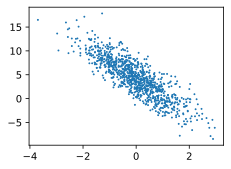

In [20]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

### 3.2.2 读取数据集

In [21]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    # 这些样本是随机读取的, 没有特定的顺序
    random.shuffle(indices)

    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [22]:
batch_size = 10
for X, y in data_iter(10, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.2177, -1.6569],
        [-1.3251,  0.7398],
        [-1.3899, -1.7617],
        [-1.7694,  0.3894],
        [ 0.7731, -0.5932],
        [-0.0626,  0.1611],
        [ 0.2016, -0.1482],
        [ 0.7070, -1.0558],
        [-2.8391, -0.0467],
        [-0.0036, -0.1608]]) 
 tensor([[ 7.3969],
        [-0.9685],
        [ 7.3959],
        [-0.6613],
        [ 7.7570],
        [ 3.5375],
        [ 5.1227],
        [ 9.2352],
        [-1.3118],
        [ 4.7398]])


### 3.2.3 初始化模型参数

In [23]:
w = torch.normal(0, 0.01, size=[2, 1], requires_grad=True)
b = torch.zeros([1], requires_grad=True)

In [24]:
w.detach().numpy(), b

(array([[0.00245698],
        [0.00165368]], dtype=float32),
 tensor([0.], requires_grad=True))

### 3.2.7 训练

In [25]:
lr = 0.03
num_epochs = 3
net = d2l.linreg
loss = d2l.squared_loss
sgd = d2l.sgd

In [26]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失

        # 因为l形状是(batch_size,1), 而不是一个标量. l中的所有元素被加到一起, 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数

    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.027283
epoch 2, loss 0.000104
epoch 3, loss 0.000054


In [27]:
w, b

(tensor([[ 1.9995],
         [-3.3995]], requires_grad=True),
 tensor([4.1994], requires_grad=True))

In [28]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0005, -0.0005], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0006], grad_fn=<RsubBackward1>)
